# Hybrid reliability methods

In this example, we demonstrate the usage of the so-called hybrid reliability methods:
* FDIR (`form_then_directional_sampling`) - reliability calculations are first performed using FORM. If FORM does not converge, the calculations are completed using Directional Sampling.
* DSFI (`directional_sampling_then_form`) - reliability calculations are initially performed with Directional Sampling, after which FORM is used to re-calculate the design point.

### Define model

First, let's import the necessary classes:

In [10]:
from probabilistic_library import ReliabilityMethod, ReliabilityProject, DistributionType

Next, we define a simple limit state function: 

$Z = 1.9 - (a+b)$

In [11]:
from utils.models import linear_a_b

### Define reliability project

We define the reliability project and the random variables $a$ and $b$:

In [12]:
project = ReliabilityProject()
project.model = linear_a_b

project.variables["a"].distribution = DistributionType.uniform
project.variables["a"].minimum = -1
project.variables["a"].maximum = 1

project.variables["b"].distribution = DistributionType.uniform
project.variables["b"].minimum = -1
project.variables["b"].maximum = 1

### Run calculations with FORM

We begin by running `form` calculations and consider two cases: one with convergence and one without.

### With convergence

In [13]:
project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.15
project.settings.maximum_iterations = 50
project.settings.epsilon_beta = 0.01

project.run()

project.design_point.print()

Reliability (FORM)
 Reliability index = 2.773
 Probability of failure = 0.002778
 Convergence = 0.008383 (converged)
 Model runs = 126
Alpha values:
 a: alpha = -0.7071, x = 0.9501
 b: alpha = -0.7071, x = 0.9501



#### Without convergence

By reducing the maximum number of iterations, we create a case where `form` does not converge:

In [14]:
project.settings.reliability_method = ReliabilityMethod.form
project.settings.relaxation_factor = 0.15
project.settings.maximum_iterations = 10
project.settings.epsilon_beta = 0.01

project.run()

project.design_point.print()

Reliability (FORM)
 Reliability index = 2.348
 Probability of failure = 0.009427
 Convergence = 1.224 (not converged)
 Model runs = 30
Alpha values:
 a: alpha = -0.7071, x = 0.9032
 b: alpha = -0.7071, x = 0.9032



### Calculations with Directional Sampling

We also run the reliability calculations with `directional_sampling`:

In [15]:
project.settings.reliability_method = ReliabilityMethod.directional_sampling
project.settings.variation_coefficient = 0.02
project.settings.minimum_directions = 10000
project.settings.maximum_directions = 50000

project.run()

project.design_point.print()

Reliability (Directional Sampling)
 Reliability index = 3.018
 Probability of failure = 0.001273
 Convergence = 0.02 (converged)
 Model runs = 109683
Alpha values:
 a: alpha = -0.7065, x = 0.967
 b: alpha = -0.7077, x = 0.9673



### Run calculations with FDIR

We now perform calculations using `form_then_directional_sampling`.

If `form` converges, the results should match the `form` results.

In [16]:
project.settings.reliability_method = ReliabilityMethod.form_then_directional_sampling
project.settings.relaxation_factor = 0.15
project.settings.maximum_iterations = 50
project.settings.epsilon_beta = 0.01
project.settings.variation_coefficient = 0.02
project.settings.minimum_directions = 10000
project.settings.maximum_directions = 20000

project.run()

project.design_point.print()

Reliability (FORM)
 Reliability index = 2.773
 Probability of failure = 0.002778
 Convergence = 0.008383 (converged)
 Model runs = 126
Alpha values:
 a: alpha = -0.7071, x = 0.9501
 b: alpha = -0.7071, x = 0.9501



When `form` does not converge, the results should match those of `directional_sampling`:

In [17]:
project.settings.reliability_method = ReliabilityMethod.form_then_directional_sampling
project.settings.relaxation_factor = 0.15
project.settings.maximum_iterations = 10
project.settings.epsilon_beta = 0.01
project.settings.variation_coefficient = 0.02
project.settings.minimum_directions = 10000
project.settings.maximum_directions = 50000

project.run()

project.design_point.print()

Reliability (Directional Sampling)
 Reliability index = 3.018
 Probability of failure = 0.001273
 Convergence = 0.02 (converged)
 Model runs = 109683
Alpha values:
 a: alpha = -0.7065, x = 0.967
 b: alpha = -0.7077, x = 0.9673

Contributing design points:
  Reliability (FORM)
   Reliability index = 2.348
   Probability of failure = 0.009427
   Convergence = 1.224 (not converged)
   Model runs = 30
  Alpha values:
   a: alpha = -0.7071, x = 0.9032
   b: alpha = -0.7071, x = 0.9032



### Calculations with DSFI

We now perform reliability calculations using `directional_sampling_then_form`. The resulting reliability index (beta) must match the reliability index calculated with `directional_sampling`. However, the design point is re-calculated using `form` and, therefore, differs from the one obtained with `directional_sampling`.

Reliability (Dir. Sampling then FORM)
 Reliability index = 3.018
 Probability of failure = 0.001273
 Model runs = 0
Alpha values:
 a: alpha = -0.7071, x = 0.9499
 b: alpha = -0.7071, x = 0.9499

Contributing design points:
  Reliability (Directional Sampling)
   Reliability index = 3.018
   Probability of failure = 0.001273
   Convergence = 0.02 (converged)
   Model runs = 109683
  Alpha values:
   a: alpha = -0.7065, x = 0.967
   b: alpha = -0.7077, x = 0.9673

  Reliability (FORM)
   Reliability index = 2.771
   Probability of failure = 0.002798
   Convergence = 0.009011 (converged)
   Model runs = 54
  Alpha values:
   a: alpha = -0.7071, x = 0.9499
   b: alpha = -0.7071, x = 0.9499



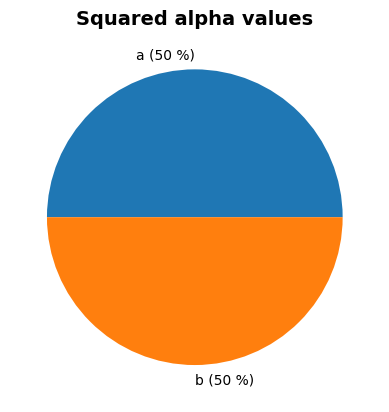

In [18]:
project.settings.reliability_method = ReliabilityMethod.directional_sampling_then_form
project.settings.relaxation_factor = 0.15
project.settings.maximum_iterations = 50
project.settings.epsilon_beta = 0.01
project.settings.variation_coefficient = 0.02
project.settings.minimum_directions = 10000
project.settings.maximum_directions = 50000

project.run()

project.design_point.print()
project.design_point.plot_alphas()
